In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [2]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_mol(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

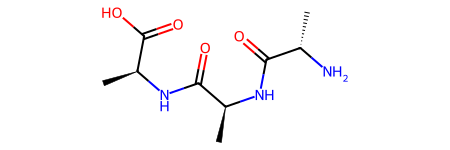

In [16]:
mol_h = Chem.MolFromHELM("PEPTIDE1{A.A.A}$$$$")
mol_h

In [4]:
import re

def combine_monomers(m1: Mol, m1_r_num: int, m2: Mol, m2_r_num: int) -> Mol:
    m1_r_str = "_R" + str(m1_r_num)
    m2_r_str = "_R" + str(m2_r_num)
    for a in m1.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(m1_r_str):
            a.SetAtomMapNum(1)
    for a in m2.GetAtoms():
        if a.HasProp("atomLabel") and a.GetProp("atomLabel").endswith(m2_r_str):
            a.SetAtomMapNum(1)
    return Chem.molzip(m1, m2)

def combine_backbone_monomers(m1: Mol, m2: Mol) -> Mol:
    return combine_monomers(m1, 2, m2, 1)

#should remember which cap should be applied
def close_r(mol: Mol, cap: Mol):
    for a in cap.GetAtoms():
        if a.HasProp("atomLabel"):
            r_str = a.GetProp("atomLabel")
            r_num = int(re.search(r'\d+$', r_str).group())
    return combine_monomers(mol, r_num, cap, r_num)


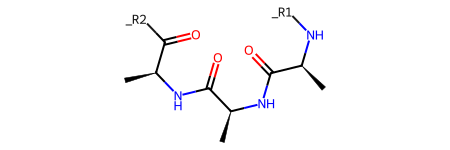

In [14]:
mol_a1 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_a2 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_a3 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_aa = combine_backbone_monomers(mol_a1, mol_a2)
mol_aaa = combine_backbone_monomers(mol_aa, mol_a3)
mol_aaa

[12:37:01] WARNING: not removing hydrogen atom with dummy atom neighbors


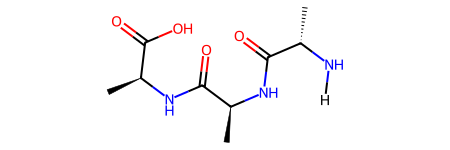

In [ ]:
r1_mol = Chem.MolFromSmiles("[*][H] |$_R1;$|")
r2_mol = Chem.MolFromSmiles("O[*] |$;_R2$|")
r3_h_mol = Chem.MolFromSmiles("[*][H] |$_R3;$|")
r3_oh_mol = Chem.MolFromSmiles("O[*] |$;_R3$|")
mol_aaa = close_r(mol_aaa, r1_mol)
mol_aaa = close_r(mol_aaa, r2_mol)
mol_aaa

In [17]:
is_same_mol(mol_aaa, mol_h)

True

In [81]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib = MonomersLib.load(monomers_lib_path)

In [83]:
print(lib.get_monomer_smiles("PEPTIDE", "A"))
print(lib.get_attachment_cap_smiles("PEPTIDE", "A", "R1"))

C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|
[*][H] |$_R1;$|
